In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Airplane Passenger Satisfaction Dataset
[Download dataset (place "archive" folder in directory with notebook)](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/download?datasetVersionNumber=1)

In [34]:
test_df = pd.read_csv('archive/test.csv')
train_df = pd.read_csv('archive/train.csv')
airplane_df = pd.concat([test_df, train_df], ignore_index=True)

airplane_df['satisfaction_bool'] = airplane_df['satisfaction'] == "satisfied"

# Get rid of all surveys with "not applicable" answers. There columns will now all be ranked on a scale of 1 to 5
airplane_df.dropna()
airplane_df = airplane_df[airplane_df['Inflight wifi service'] != 0]
airplane_df = airplane_df[airplane_df['Departure/Arrival time convenient'] != 0]
airplane_df = airplane_df[airplane_df['Ease of Online booking'] != 0]
airplane_df = airplane_df[airplane_df['Gate location'] != 0]
airplane_df = airplane_df[airplane_df['Food and drink'] != 0]
airplane_df = airplane_df[airplane_df['Online boarding'] != 0]
airplane_df = airplane_df[airplane_df['Seat comfort'] != 0]
airplane_df = airplane_df[airplane_df['Inflight entertainment'] != 0]
airplane_df = airplane_df[airplane_df['On-board service'] != 0]
airplane_df = airplane_df[airplane_df['Leg room service'] != 0]
airplane_df = airplane_df[airplane_df['Baggage handling'] != 0]
airplane_df = airplane_df[airplane_df['Checkin service'] != 0]
airplane_df = airplane_df[airplane_df['Inflight service'] != 0]
airplane_df = airplane_df[airplane_df['Cleanliness'] != 0]

display(airplane_df)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_bool
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,True
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,True
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,True
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,4,3,1,1,2,5,0,0.0,satisfied,True
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,4,5,3,0,0.0,satisfied,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,False
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,4,0,0.0,satisfied,True
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,False
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,False


Percentage of satisfied passengers in each cell:


Seat comfort,1,2,3,4,5
Leg room service,,,,,
5,30.548469,31.248223,34.509161,77.809373,79.502621
4,28.275862,28.796343,28.690525,72.276790,79.093838
3,10.558793,13.127001,12.075170,34.530176,44.802867
2,12.150943,13.232831,13.132105,33.241252,43.957968
1,6.571816,8.150317,8.560172,23.513011,34.841418


Counts of passengers in each cell:


Seat comfort,1,2,3,4,5
Leg room service,,,,,
5,3136,3517,3657,9495,8967
4,3335,3938,4918,11301,10241
3,2917,3748,5002,6545,4743
2,2650,3582,5102,6516,4568
1,1476,2049,2792,3228,2144


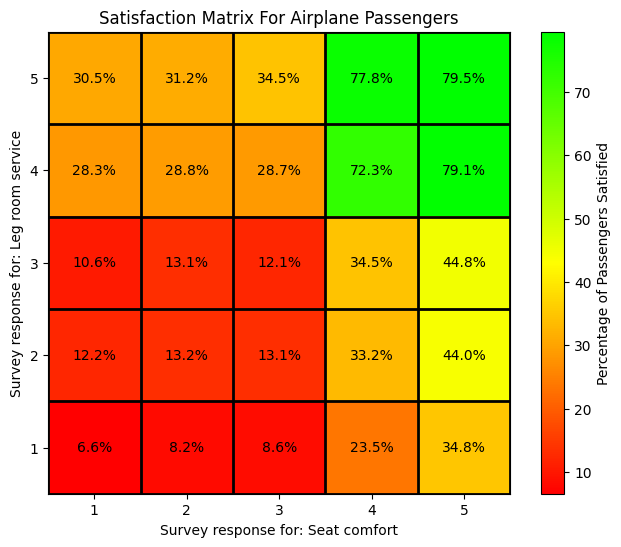

In [66]:
from matplotlib.colors import LinearSegmentedColormap

# Choose desired pair of attributes:
x_attribute = 'Seat comfort'
y_attribute = 'Leg room service'

satisfaction_matrix = airplane_df.groupby([y_attribute, x_attribute])['satisfaction_bool'].mean().unstack() * 100
# Reverse row order so that review quality goes from bottom-left to top-right (instead of from top-left to bottom-right)
satisfaction_matrix = satisfaction_matrix.iloc[::-1]

print("Percentage of satisfied passengers in each cell:")
display(satisfaction_matrix)

print("Counts of passengers in each cell:")
counts_matrix = airplane_df.pivot_table(index=y_attribute, columns=x_attribute, aggfunc='size', fill_value=0)
counts_matrix = counts_matrix.iloc[::-1]
display(counts_matrix)

colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # Red, Black, Green
custom_cmap = LinearSegmentedColormap.from_list('Custom', colors)

plt.figure(figsize=(8, 6))
plt.imshow(satisfaction_matrix, cmap=custom_cmap, interpolation='nearest')

# Adding percentage text to each cell
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{satisfaction_matrix.values[i, j]:.1f}%', ha='center', va='center', color='black')

# Drawing lines on cell borders
# Next task is to make it so that a decision boundary can be drawn on the matrix
for i in range(6):
    plt.axhline(i - 0.5, color='black', lw=2)
    plt.axvline(i - 0.5, color='black', lw=2)

plt.title('Satisfaction Matrix For Airplane Passengers')
plt.xlabel("Survey response for: " + x_attribute)
plt.ylabel("Survey response for: " + y_attribute)
plt.xticks(range(5), range(1, 6))
plt.yticks(range(5), range(5, 0 ,-1))
plt.colorbar(label='Percentage of Passengers Satisfied')
plt.grid(False)
plt.show()


C:\Users\stock\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


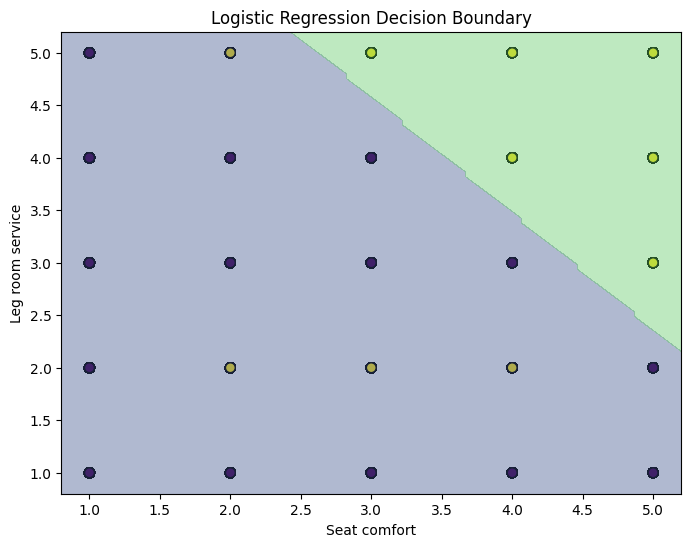

Precision: [0.76310723 0.70597471]
Recall: [0.79234574 0.66964531]
F-score: [0.77745168 0.68733029]
Support: [68537 51030]


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

# This block will be used to test just two attributes at a time
X = airplane_df[[x_attribute, y_attribute]]
y = airplane_df['satisfaction_bool']

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[x_attribute], X[y_attribute], c=y, cmap='viridis', edgecolor='k', s=50)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title('Logistic Regression Decision Boundary')

plt.show()

precision, recall, fscore, support = precision_recall_fscore_support(y, logistic_model.predict(X))

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)
print("Support:", support)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

# This is just testing every single attribute, so we're obviously going to get a good f score.
# For practical purposes, it's probably more meaningful to find the best combination of just two attributes for airports to focus on.
X = airplane_df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                 'Seat comfort', 'Inflight entertainment', 'On-board service',  'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]
y = airplane_df['satisfaction_bool']

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X, y)

precision, recall, fscore, support = precision_recall_fscore_support(y, logistic_model.predict(X))

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)
print("Support:", support)

Precision: [0.86428363 0.81776315]
Recall: [0.86432146 0.81771507]
F-score: [0.86430255 0.81773911]
Support: [68537 51030]


## Second dataset